# 表層的ディープラーニング入門 
## 第1回「Denseです」
* ディープラーニングでできることの概要を知る
    * ディープラーニング: 層の多いニューラルネットワーク + 最近わかったノウハウ
* 全結合層を用いたディープラーニングを試してみる
    * 性能向上や速い学習のために、いくつか押さえておくポイントがある
        * ランダマイズ
        * データ正規化
    * 備考
        * 今回は数値から数値へと変換する例
        * 数値以外のものを数値として扱う方法もある（各自調べる or 次回説明する）

## 1. ディープラーニングとは
* y = function( x ) を作る
    * (x,y) = (天気, おでんの売上), (画像, 猫or犬), (音楽, ジャンル), (文章, 印象)
* def function( x ): ... return y を書く代わりに
    * データ (画像1, 猫), (画像2, 犬), (画像3, 猫), ... , (画像5312, 猫) を集める
    * ニューラルネットワークに画像を入力すると、正しく犬猫が判別できるようにパラメタを調整する
    * 調整されたパラメタを使って、(画像, ?)に対して犬か猫かを判別する

## 2. さっそく試す: 手書き数字の識別
* Optical Recognition of Handwritten Digits Data Set
* C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition, MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University. 

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [167]:
from keras.layers import Input, Dense
from keras.models import Model

In [168]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

(1797, 64)


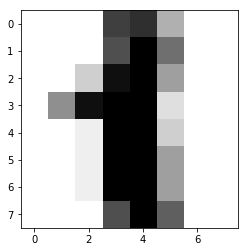

1


In [194]:
print(digits.data.shape)
#
plt.imshow(digits.data[1].reshape([8,8]), cmap='binary')
plt.show()
print(digits.target[1])

In [195]:
def fc_layers():
    
    inputs = Input(shape=(64,))
    x = Dense(32, activation='relu')(inputs)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy')
    
    return model

In [196]:
model = fc_layers()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [197]:
print(digits.target)
np_utils.to_categorical(digits.target)

[0 1 2 ... 8 9 8]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [198]:
# 入力と出力
X = digits.data
Y = np_utils.to_categorical(digits.target)

# 学習データとテストデータ
ind = list(range(1797))
np.random.shuffle(ind)
X_train = X[ind[:1600]]
Y_train = Y[ind[:1600]]
X_test = X[ind[1600:]]
Y_test = Y[ind[1600:]]

In [199]:
xm = np.mean(X_train, axis=0)
xs = np.std(X_train, axis=0)
X_train = (X_train - xm) / (xs+0.0000001)

In [200]:
fitting = model.fit(X_train, Y_train, epochs=200, verbose=0)  

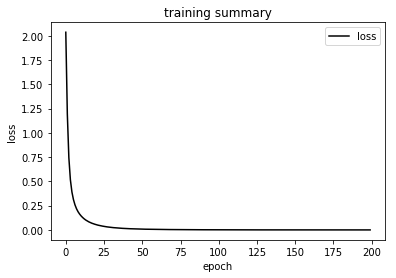

In [201]:
fig, ax1 = plt.subplots()

plt.title('training summary')
ax1.plot(fitting.history['loss'], '-', label='loss', c='black')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [202]:
Y_pred = model.predict((X_test - xm)/(xs+0.000001))
print(np.argmax(Y_pred, axis=1))
print(np.argmax(Y_test, axis=1))

[6 9 2 8 6 3 9 1 8 0 1 6 0 0 1 1 2 8 1 8 9 5 3 6 3 4 8 7 2 0 8 3 4 5 7 0 1
 5 2 8 0 5 5 8 4 7 6 5 4 6 1 3 9 3 1 1 0 4 3 1 1 3 0 7 0 2 0 6 3 5 0 1 7 8
 6 8 5 6 6 8 3 2 4 8 1 1 9 1 7 4 2 9 7 3 9 7 5 4 5 5 5 9 9 4 8 7 1 0 9 0 7
 3 9 3 3 5 9 9 5 3 6 6 6 5 8 1 2 0 2 8 4 6 4 0 7 3 0 4 7 9 8 9 3 3 0 7 0 2
 1 0 0 3 1 2 6 4 2 9 6 0 9 2 3 8 6 4 7 8 7 5 9 7 4 8 8 5 8 2 4 3 5 9 3 4 3
 1 2 2 6 8 7 2 5 5 1 6 9]
[6 9 2 8 6 3 9 1 8 0 1 6 0 0 1 1 2 8 1 8 9 5 3 6 3 4 8 7 2 0 8 3 4 5 7 0 1
 5 2 8 0 9 5 8 4 7 6 5 4 6 1 3 9 3 1 1 0 4 3 1 1 3 0 7 0 2 0 6 3 5 0 1 7 8
 6 8 5 6 6 8 3 2 4 9 1 1 9 1 7 4 2 9 7 3 9 7 5 4 5 5 5 9 9 4 8 7 1 0 9 0 7
 3 9 3 3 5 9 9 5 3 6 6 6 5 8 1 2 0 2 8 4 6 4 0 7 3 0 4 7 9 8 9 3 3 0 7 0 2
 1 0 0 3 1 2 6 2 2 9 6 0 9 2 3 8 6 4 7 8 7 5 9 7 4 8 8 8 8 2 4 9 5 9 3 4 3
 1 2 2 6 8 7 2 5 5 1 6 9]


In [203]:
def accuracy(x, y):
    return np.sum(x==y) / (1.0*len(x))

In [204]:
accuracy(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))

0.9746192893401016

### 入力データ正規化の効果

In [205]:
model = fc_layers()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                330       
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [206]:
# 入力と出力
X = digits.data
Y = np_utils.to_categorical(digits.target)

# 学習データとテストデータ
ind = list(range(1797))
np.random.shuffle(ind)
X_train = X[ind[:1600]]
Y_train = Y[ind[:1600]]
X_test = X[ind[1600:]]
Y_test = Y[ind[1600:]]

In [207]:
fitting = model.fit(X_train, Y_train, epochs=200, verbose=0)  

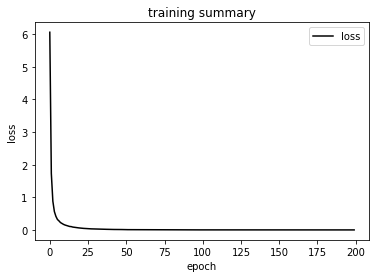

In [208]:
fig, ax1 = plt.subplots()

plt.title('training summary')
ax1.plot(fitting.history['loss'], '-', label='loss', c='black')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [209]:
Y_pred = model.predict((X_test - xm)/(xs+0.000001))
print(np.argmax(Y_pred, axis=1))
print(np.argmax(Y_test, axis=1))

[2 7 9 2 3 9 2 5 7 4 0 5 3 5 4 6 2 6 5 6 9 4 8 9 0 4 0 7 2 4 1 4 1 8 3 8 7
 0 2 9 8 6 2 5 4 0 5 9 6 2 3 8 5 2 7 9 1 4 9 9 7 8 2 5 7 8 6 5 4 5 6 5 5 0
 9 6 8 9 9 3 7 8 5 9 0 6 6 8 8 4 8 4 7 9 0 8 4 8 4 7 0 3 4 8 9 9 6 0 7 3 1
 7 9 2 7 9 1 3 9 5 9 1 8 7 3 2 7 7 7 2 3 7 4 4 0 9 4 9 7 7 4 6 3 1 4 6 6 6
 5 7 9 9 7 8 5 6 0 9 6 4 5 9 5 4 3 3 8 6 3 2 5 0 2 5 5 7 0 9 0 2 9 2 8 9 9
 2 4 2 4 4 3 1 6 8 4 4 9]
[2 7 9 2 3 9 2 5 9 4 0 7 3 5 4 6 2 6 5 6 9 4 8 5 0 0 0 7 2 1 1 4 1 1 3 2 7
 0 2 8 8 6 2 5 4 0 5 9 6 2 3 2 5 2 0 3 9 0 8 9 7 3 2 5 7 1 6 9 4 7 6 5 5 0
 9 6 5 8 9 5 1 8 5 9 0 6 6 8 8 4 1 4 7 9 0 1 4 8 4 7 0 1 4 1 9 9 6 0 7 2 1
 7 9 2 7 7 1 1 7 5 9 1 8 7 3 2 7 6 7 2 3 5 4 1 0 9 9 8 9 7 6 6 3 1 4 6 6 6
 3 7 9 9 7 8 5 6 0 9 6 4 5 9 5 4 3 3 2 6 2 2 5 0 2 5 5 0 0 9 0 2 8 2 6 9 9
 2 4 2 4 4 3 1 6 8 4 4 9]


In [210]:
accuracy(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))

0.7817258883248731